In [125]:
import pandas as pd
water_treatment = pd.read_csv("Dataset Tutorial 2/water-treatment.csv", index_col=False)
water_treatment.head() #Look at the head of the data (just the first few rows)

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.5,7.8,NaN,407.0,166.0,66.3,4.5,2110,...,2000.0,NaN,58.8,95.5,NaN,70.0,NaN,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,NaN,443.0,214.0,69.2,6.5,2660,...,2590.0,NaN,60.7,94.8,NaN,80.8,NaN,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,NaN,528.0,186.0,69.9,3.4,1666,...,1888.0,NaN,58.2,95.6,NaN,52.9,NaN,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.0,588.0,192.0,65.6,4.5,2430,...,1840.0,33.1,64.2,95.3,87.3,72.3,90.2,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.0,496.0,176.0,64.8,4.0,2110,...,2120.0,NaN,62.7,95.6,NaN,71.0,92.1,78.2,87.5,99.5


In [126]:
water_treatment = water_treatment.fillna(water_treatment.mean())
water_treatment.head()

,Date,Q-E,ZN-E,PH-E,DBO-E,DQO-E,SS-E,SSV-E,SED-E,COND-E,...,COND-S,RD-DBO-P,RD-SS-P,RD-SED-P,RD-DBO-S,RD-DQO-S,RD-DBO-G,RD-DQO-G,RD-SS-G,RD-SED-G
0,D-1/3/90,44101.0,1.5,7.8,188.714286,407.0,166.0,66.3,4.5,2110,...,2000.0,39.085806,58.8,95.5,83.448049,70.0,89.013646,79.4,87.3,99.6
1,D-2/3/90,39024.0,3.0,7.7,188.714286,443.0,214.0,69.2,6.5,2660,...,2590.0,39.085806,60.7,94.8,83.448049,80.8,89.013646,79.5,92.1,100.0
2,D-4/3/90,32229.0,5.0,7.6,188.714286,528.0,186.0,69.9,3.4,1666,...,1888.0,39.085806,58.2,95.6,83.448049,52.9,89.013646,75.8,88.7,98.5
3,D-5/3/90,35023.0,3.5,7.9,205.000000,588.0,192.0,65.6,4.5,2430,...,1840.0,33.100000,64.2,95.3,87.300000,72.3,90.200000,82.3,89.6,100.0
4,D-6/3/90,36924.0,1.5,8.0,242.000000,496.0,176.0,64.8,4.0,2110,...,2120.0,39.085806,62.7,95.6,83.448049,71.0,92.100000,78.2,87.5,99.5


In [127]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd
import numpy as np
%matplotlib inline

# Before Feature Extraction

K-Means Semua Fitur
    K      time     score
0   2  0.142211  0.582743
1   3  0.156272  0.472483
2   4  0.109395  0.482187
3   5  0.156273  0.481128
4   6  0.125021  0.482109
5   7  0.156273  0.468700
6   8  0.160929  0.453114
7   9  0.140638  0.420268
8  10  0.162448  0.423610


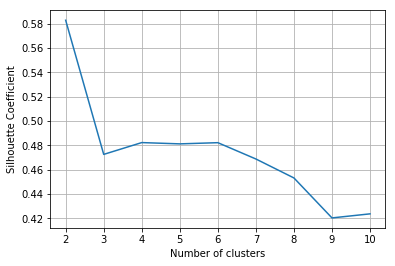

In [109]:
feature_cols = ['Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E','PH-P','DBO-P','SS-P','SSV-P','SED-P','COND-P','PH-D','DBO-D','DQO-D','SS-D','SSV-D','SED-D','COND-D','PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S','RD-DBO-P','RD-SS-P','RD-SED-P','RD-DBO-S','RD-DQO-S','RD-DBO-G','RD-DQO-G','RD-SS-G','RD-SED-G']
feature_data_in_water_treatment = water_treatment[feature_cols]
from sklearn import metrics
import time
# calculate SC for K=2 through K=11
k_range = range(2, 11)

# creating data frame to see the difference between every k
add_to_frame = []
for k in k_range:
    value = []
    value.append(k)
    start_time = time.time()
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(feature_data_in_water_treatment)
    value.append(time.time() - start_time)
    value.append(metrics.silhouette_score(feature_data_in_water_treatment, km.labels_))
    add_to_frame.append(value)
result = pd.DataFrame(add_to_frame, columns=['K', 'time', 'score'])

# plot the results
plt.plot(k_range, result.score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
print("K-Means Semua Fitur")
print (result)

In [112]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(feature_data_in_water_treatment)
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (predY)

[0 1 2 1 1 1 1 1 2 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 1 0 0 2 1 1 1 1 1 2 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 2 2 1 1 1 2 2 2 1 0 0 1 1 1 0 0 0 0 1 2 1 1
 0 1 1 0 1 1 2 1 1 0 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 2 1 1 0 1 1
 1 1 1 2 1 2 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 2 1 1 0 1 1 0 0 1 1 2
 2 2 1 1 1 1 2 1 1 0 1 2 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 0 0 1 1 1 1 0 1 1
 1 1 2 0 0 0 0 0 1 1 0 0 0 1 0 2 2 0 0 1 0 0 0 0 0 0 1 1 2 1 1 1 1 2 2 1 1
 1 1 1 0 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 2 2 1 1 2 2 0 0 1 0 0 0 0 0 1 0
 0 0 2 2 1 0 0 1 2 2 2 0 0 2 2 2 0 0 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 2 2 1 1 0 0 0 1 1 1 1 2 2 2 2 2 2 2 2 0 0 0 1 1 2 1 2 1 1 1 1 2 2
 2 2 1 2 1 1 1 1 2 1 2 2 2 2 2 2 1 1 1 1 1 1 1 1 0 2 0 0 0 0 1 2 1 1 1 1 1
 2 2 2 2 1 0 0 1 1 2 1 0 0 0 0 0 1 2 2 2 2 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0
 2 2 2 2 1 2 2 2 2 2 1 1 2 1 1 1 1 1 2 1 2 1 1 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 1 2 2 1 1 2 2 2 2 2 1 2
 2 2 2 2 2 1 1 0 1 2 2 1 

Text(0.5,1,'K Mean')

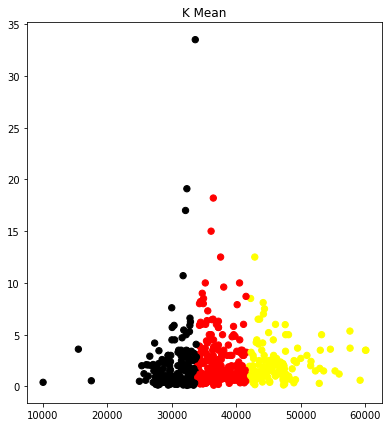

In [123]:
# View the results
# Set the size of the plot
plt.figure(figsize=(14,7))
# Create a colormap
colormap = np.array(['red', 'yellow', 'black'])
# Plot Predicted with corrected values
plt.subplot(1, 2, 2)
plt.scatter(feature_data_in_water_treatment['Q-E'], feature_data_in_water_treatment['ZN-E'], c=colormap[predY], s=40)
plt.title('K Mean')

# After Feature Extraction

K-Means 10 Fitur (Setelah Reduksi)
    K      time     score
0   2  0.101152  0.582906
1   3  0.125019  0.472774
2   4  0.093763  0.482529
3   5  0.125016  0.481602
4   6  0.109393  0.482598
5   7  0.131885  0.469342
6   8  0.127524  0.453902
7   9  0.134207  0.421217
8  10  0.100032  0.422698


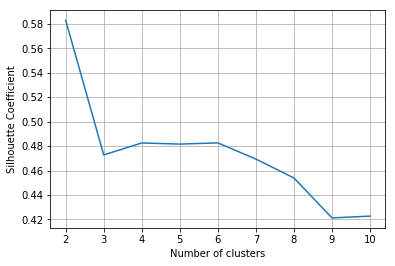

In [129]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
feature_cols = ['Q-E','ZN-E','PH-E','DBO-E','DQO-E','SS-E','SSV-E','SED-E','COND-E','PH-P','DBO-P','SS-P','SSV-P','SED-P','COND-P','PH-D','DBO-D','DQO-D','SS-D','SSV-D','SED-D','COND-D','PH-S','DBO-S','DQO-S','SS-S','SSV-S','SED-S','COND-S','RD-DBO-P','RD-SS-P','RD-SED-P','RD-DBO-S','RD-DQO-S','RD-DBO-G','RD-DQO-G','RD-SS-G','RD-SED-G']
feature_data_in_water_treatment = water_treatment[feature_cols]

pca = decomposition.PCA(n_components=10)
pca.fit(feature_data_in_water_treatment)
feature_data_in_water_treatment_decomposed = pca.transform(feature_data_in_water_treatment)

# calculate SC for K=2 through K=11
k_range = range(2, 11)

# creating data frame to see the difference between every k
add_to_frame = []
for k in k_range:
    value = []
    value.append(k)
    start_time = time.time()
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(feature_data_in_water_treatment_decomposed)
    value.append(time.time() - start_time)
    value.append(metrics.silhouette_score(feature_data_in_water_treatment_decomposed, km.labels_))
    add_to_frame.append(value)
result = pd.DataFrame(add_to_frame, columns=['K', 'time', 'score'])

# plot the results
plt.plot(k_range, result.score)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)
print("K-Means 10 Fitur (Setelah Reduksi)")
print (result)

In [119]:
# K Means Cluster
model = KMeans(n_clusters=3)
model.fit(feature_data_in_water_treatment_decomposed)
# The fix, we convert all the 1s to 0s and 0s to 1s.
predY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)
print (predY)

[1 0 2 0 0 0 0 0 2 0 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0 1 1 2 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 2 0 0 0 2 2 2 0 1 1 0 0 0 1 1 1 1 0 2 0 0
 1 0 0 1 0 0 2 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 2 0 0 1 0 0
 0 0 0 2 0 2 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 2 0 0 1 0 0 1 1 0 0 2
 2 2 0 0 0 0 2 0 0 1 0 2 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 1 1 0 0 0 0 1 0 0
 0 0 2 1 1 1 1 1 0 0 1 1 1 0 1 2 2 1 1 0 1 1 1 1 1 1 0 0 2 0 0 0 0 2 2 0 0
 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 2 0 0 2 2 1 1 0 1 1 1 1 1 0 1
 1 1 2 2 0 1 1 0 2 2 2 1 1 2 2 2 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 2 2 0 0 1 1 1 0 0 0 0 2 2 2 2 2 2 2 2 1 1 1 0 0 2 0 2 0 0 0 0 2 2
 2 2 0 2 0 0 0 0 2 0 2 2 2 2 2 2 0 0 0 0 0 0 0 0 1 2 1 1 1 1 0 2 0 0 0 0 0
 2 2 2 2 0 1 1 0 0 2 0 1 1 1 1 1 0 2 2 2 2 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1
 2 2 2 2 0 2 2 2 2 2 0 0 2 0 0 0 0 0 2 0 2 0 0 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 0 2 2 2 2 0 2 0 2 0 0 2 2 0 0 2 2 2 2 2 0 2
 2 2 2 2 2 0 0 1 0 2 2 0 